In [1]:
#preprocesing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#modele
from sklearn.ensemble import HistGradientBoostingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

#metryki
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#inne
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV

#patch dla scikit-learn
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:

df_final =pd.read_csv('finale.csv')

df_final.columns=[['price','price_per_meter'  'address', 'area', 'number_of_rooms', 'rent','availability' 'year_of_construction', 'floor', 'number_of_floors', 'balcony','garden', 'terrace', 'internet', 'phone', 'cable_tv','intercom', 'security_door_windows', 'security_monitoring','anti-burglary_blinds', 'alarm_system', 'closed_terrace', 'stove','refrigerator', 'furniture', 'oven', 'washing_machine', 'tv', 'dishwasher','duplex', 'separate_kitchen', 'cellar', 'utility_room','latitude', 'longitude', 'ownership_form_full_ownership','ownership_form_cooperative_with_land_and_mortgage_register','ownership_form_cooperative_ownership', 'ownership_form_share','condition_to_renovate', 'condition_to_finish', 'condition_ready_to_move_in','parking_space_garage/parking_space', 'heating_district_heating','heating_boiler_room', 'heating_gas', 'heating_other', 'heating_electric','heating_tiled_stove', 'market_primary','advertiser_real_estate_agency', 'advertiser_developer','advertiser_private', 'building_type_apartment_building','building_type_block', 'building_type_detached_house','building_type_townhouse', 'building_type_loft','building_type_plomba', 'building_type_row_house','windows_aluminium', 'windows_wood', 'windows_plastic','elevator_yes', 'material_concrete', 'material_aerated_concrete','material_brick', 'material_wood', 'material_ceramsite','material_silicate', 'material_large_panel', 'material_reinforced_concrete']]

df_final=df_final[['price',  'address', 'area', 'number_of_rooms', 'rent', 'year_of_construction', 'floor', 'number_of_floors', 'balcony','garden', 'terrace', 'internet', 'phone', 'cable_tv','intercom', 'security_door_windows', 'security_monitoring','anti-burglary_blinds', 'alarm_system', 'closed_terrace', 'stove','refrigerator', 'furniture', 'oven', 'washing_machine', 'tv', 'dishwasher','duplex', 'separate_kitchen', 'cellar', 'utility_room','latitude', 'longitude', 'ownership_form_full_ownership','ownership_form_cooperative_with_land_and_mortgage_register','ownership_form_cooperative_ownership', 'ownership_form_share','condition_to_renovate', 'condition_to_finish', 'condition_ready_to_move_in','parking_space_garage/parking_space', 'heating_district_heating','heating_boiler_room', 'heating_gas', 'heating_other', 'heating_electric','heating_tiled_stove', 'market_primary','advertiser_real_estate_agency', 'advertiser_developer','advertiser_private', 'building_type_apartment_building','building_type_block', 'building_type_detached_house','building_type_townhouse', 'building_type_loft','building_type_plomba', 'building_type_row_house','windows_aluminium', 'windows_wood', 'windows_plastic','elevator_yes', 'material_concrete', 'material_aerated_concrete','material_brick', 'material_wood', 'material_ceramsite','material_silicate', 'material_large_panel', 'material_reinforced_concrete']]

y = df_final["price"]
X_standard = df_final[['area', 'number_of_rooms', 'rent',  'floor', 'number_of_floors']].copy()
X_categor = df_final.drop(['price','area', 'number_of_rooms', 'rent', 'floor', 'number_of_floors'], axis = 1)
cols = X_standard.columns
index = X_standard.index
transformer = StandardScaler().fit(X_standard)
X_standard = transformer.transform(X_standard)
X_standard = pd.DataFrame(X_standard, columns = cols, index = index)
X = pd.concat([X_standard, X_categor], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

LR: 0.285818 (0.075520)


/home/grzegorz/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grzegorz/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grzegorz/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grzegorz/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

MLP: 0.040545 (0.005629)
KNN: 0.464509 (0.077244)
CART: 0.560961 (0.119542)
RF: 0.764198 (0.081410)
XGB: 0.649776 (0.121184)
BagR: 0.740429 (0.087475)
ETR: 0.709559 (0.125194)


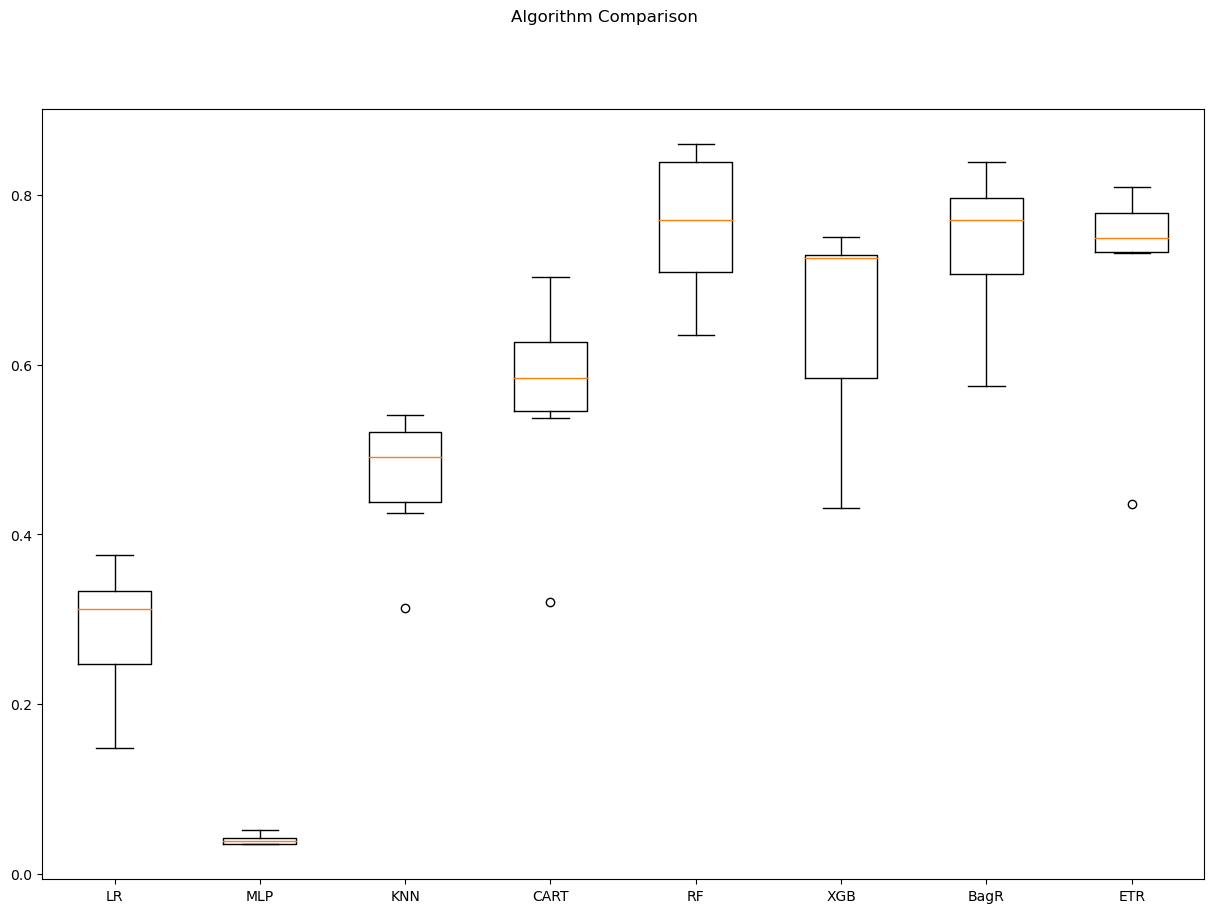

8078

In [8]:
models = []
models.append(('LR', LinearRegression()))
models.append(('MLP', MLPRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', GradientBoostingRegressor()))
models.append(('BagR', BaggingRegressor()))
models.append(( 'ETR',ExtraTreesRegressor()))

results = []
names = []


for name, model in models:
           
        cv_results = cross_val_score(model, X_train, y_train, cv = 6,n_jobs=-1)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
gc.collect()

# Random Forest

In [19]:
rf_params = {"n_estimators" :[500,1000,1500,2000], 
             "max_features": [7,14,21,28,35,42], 
             "min_samples_split": [2,3,4,5,8,15],
            "max_depth": [7,15,21]}
rf_model = RandomForestRegressor(random_state = 12345)
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    n_jobs=1,
                    verbose = 3).fit(X_train, y_train)
rf_tuned = RandomForestRegressor(**gs_cv.best_params_,random_state=12345)
rf_tuned = rf_tuned.fit(X_train,y_train)
joblib.dump(rf_tuned,'rf_tuned.pkl')

{'n_estimators': [500, 1000, 1500, 2000],
 'max_features': [7, 14, 21, 28, 35, 42],
 'min_samples_split': [2, 3, 4, 5, 8, 15],
 'max_depth': [7, 15, 21]}

In [17]:
rf_tuned=joblib.load('rf_tuned.pkl')

In [19]:
y_pred = rf_tuned.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))
# calculate RMSE based on unscaled value
rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))
cv_results = cross_val_score(rf_tuned, X_test, y_test, cv = 10)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(rf_tuned, X_test, y_test, cv = 5)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared:t 0.9441384895340708
RMSE:tt 45232.21411259432
 0.800452 (0.032979)
 0.784706 (0.027441)


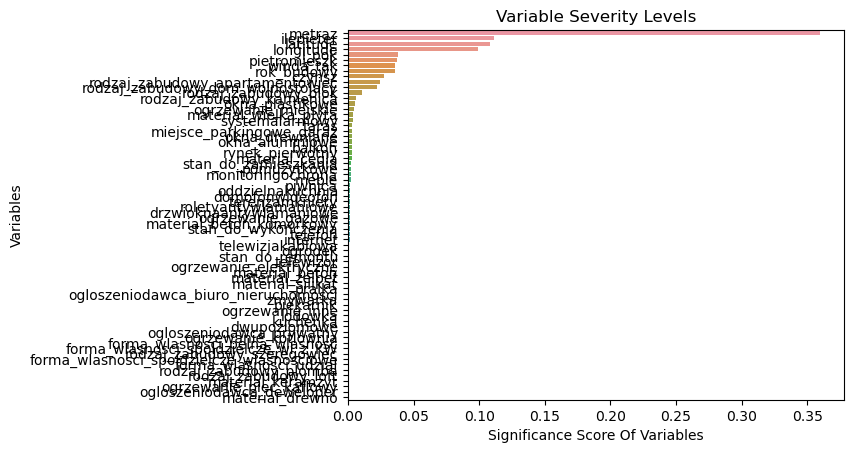

In [37]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()
mask=pd.Series(rf_tuned.feature_importances_,index=X.columns)>0.05
sig=pd.Series(rf_tuned.feature_importances_,index=X.columns)
print(sig[mask])

## Random forest sig features

In [3]:
X_sig=X[['area','number_of_floors','latitude','longitude']]
X_train_sig, X_test_sig, y_train, y_test = train_test_split(X_sig, y, test_size=0.20)
rf_model_sig = RandomForestRegressor(random_state = 12345)
rf_params = {"n_estimators" :[500,1000,1500,2000], 
             "max_features": [1,2,3,4], 
             "min_samples_split": [2,3,4,5,8,15],
            "max_depth": [7,15,21]}
gs_cv = GridSearchCV(rf_model_sig, 
                    rf_params,
                    n_jobs=-1,
                    verbose = 3).fit(X_train_sig, y_train)
rf_tuned_sig = RandomForestRegressor(**gs_cv.best_params_,random_state=12345).fit(X_train_sig,y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.740 total time=   6.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.621 total time=   6.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.487 total time=   6.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.699 total time=   5.9s
[CV 5/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.670 total time=   5.9s
[CV 1/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=1000;, score=0.741 total time=  11.8s
[CV 2/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=1000;, score=0.619 total time=  12.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=1000;, score=0.488 total time=  11.7s
[CV 4/5] END max_depth=7, max

182

In [21]:
y_pred = rf_tuned_sig.predict(X_test_sig)
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))
rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))
cv_results = cross_val_score(rf_tuned_sig, X_test_sig, y_test, cv = 10)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(rf_tuned_sig, X_test_sig, y_test, cv = 5)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
joblib.dump(rf_tuned_sig,'rf_tuned_sig.pkl')
gc.collect()

Model evaluation:
R squared:t 0.9544288916822773
RMSE:tt 48231.619976576585
 0.778154 (0.053441)
 0.767855 (0.022725)


1522

XGB

In [3]:
xgb = HistGradientBoostingRegressor(random_state = 12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
xgb_params = {
    "learning_rate": [0.01, 0.1,0.2,0.5,1],
    "max_depth":[7,8,9,None],
    "max_iter": [100,200,400,800,1000,1500,2000,3000,4000]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 4).fit(X_train, y_train)
print(xgb_cv_model.best_params_)
xgb_tuned = HistGradientBoostingRegressor(**xgb_cv_model.best_params_).fit(X_train,y_train)
joblib.dump(xgb_tuned,'xgb_tuned.pkl')

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 3/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.620 total time=   1.6s
[CV 1/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.597 total time=   1.7s
[CV 2/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.545 total time=   1.8s
[CV 5/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.591 total time=   1.5s
[CV 4/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.586 total time=   1.7s
[CV 6/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.614 total time=   1.8s
[CV 7/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.604 total time=   1.4s
[CV 8/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.550 total time=   1.9s
[CV 9/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.616 total time=   1.7s
[CV 10/10] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.346 total time=   1.7s
[CV 

In [5]:
xgb_tuned=joblib.load('xgb_tuned.pkl')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_pred = xgb_tuned.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))
# calculate RMSE based on unscaled value
rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))
cv_results = cross_val_score(xgb_tuned, X_test, y_test, cv = 10, n_jobs = -1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(xgb_tuned, X_test, y_test, cv = 5, n_jobs = -1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared:t 0.8955648720028617
RMSE:tt 82036.16705763932
 0.781508 (0.057250)
 0.774931 (0.033934)


# BagReg

In [4]:
br = BaggingRegressor(random_state = 12345)
br_params={
    'bootstrap':[True,False],
    'bootstrap_features':[False,True],
    'max_features':[1,2,5,7,14,21,28,35,42,50,60],
    'max_samples':[1.0],#,5,10,20,50],
    'n_estimators':[1,2,5,10,20,50,100,200,400,600,800,1000]}
br_cv_model  = GridSearchCV(br, br_params, cv = 5, n_jobs = 1, verbose = 4).fit(X_train, y_train)
print(br_cv_model.best_params_)
br_tuned = BaggingRegressor(**br_cv_model.best_params_).fit(X_train,y_train)
joblib.dump(br_tuned,'br_tuned.pkl')

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
[CV 1/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=1;, score=0.001 total time=   0.0s
[CV 2/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=1;, score=0.001 total time=   0.0s
[CV 3/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=1;, score=0.002 total time=   0.0s
[CV 4/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=1;, score=0.001 total time=   0.0s
[CV 5/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=1;, score=0.001 total time=   0.0s
[CV 1/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=2;, score=0.001 total time=   0.0s
[CV 2/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=2;, score=0.001 tot

In [7]:
br_tuned=joblib.load('br_tuned2.pkl')

In [8]:
y_pred = br_tuned.predict(X_test)

print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))

rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))
cv_results = cross_val_score(br_tuned, X_test, y_test, cv = 10, n_jobs = -1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(br_tuned, X_test, y_test, cv = 5, n_jobs = -1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared:t 0.9585747916419791
RMSE:tt 39731.56571066166
 0.747306 (0.056689)
 0.760137 (0.037218)


In [7]:
from sklearn.ensemble import VotingRegressor

In [24]:
voting=VotingRegressor([('rtf',rf_tuned),('xgb',xgb_tuned),('br',br_tuned)]).fit(X_train,y_train)

In [25]:

y_pred = voting.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))
# calculate RMSE based on unscaled value
rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))
cv_results = cross_val_score(voting, X_test, y_test, cv = 10, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(voting, X_test, y_test, cv = 5, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared:t 0.8593621612508782
RMSE:tt 82252.28469108112
 0.779130 (0.070569)
 0.775100 (0.048510)


In [26]:
y_pred_br = br_tuned.predict(X_test)
y_pred_rf = rf_tuned.predict(X_test)
y_pred_xgb= xgb_tuned.predict(X_test)
y_pred=(y_pred_rf+y_pred_xgb+y_pred_br)/(3)

print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))
rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))

Model evaluation:
R squared:t 0.946906084508665
RMSE:tt 53242.470986715045


Sieć neuronowa

In [4]:
from math import sqrt
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
x_len = len(X_train.columns)
model = Sequential([
Dense(69, activation='relu', input_shape=(x_len,)),
Dense(69, activation='relu'),
Dense(69, activation='relu'),
Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mean_absolute_error')
hist = model.fit(X_train, y_train,batch_size=16, epochs=800,validation_data=(X_test, y_test))

2023-05-16 19:16:04.075966: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-16 19:16:04.108961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-16 19:16:04.109094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-16 19:16:04.109400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Epoch 1/800


2023-05-16 19:16:06.448660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-16 19:16:06.476423: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fbbedc84710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-16 19:16:06.476473: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-05-16 19:16:06.503017: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-16 19:16:06.704184: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3163/3163 [==============================] - 8s 2ms/step - loss: 245793.4688 - val_loss: 228553.0781
Epoch 2/800
3163/3163 [==============================] - 6s 2ms/step - loss: 232451.2812 - val_loss: 227311.3438
Epoch 3/800
3163/3163 [==============================] - 5s 2ms/step - loss: 229754.4844 - val_loss: 223255.0312
Epoch 4/800
3163/3163 [==============================] - 6s 2ms/step - loss: 219363.8906 - val_loss: 199252.7031
Epoch 5/800
3163/3163 [==============================] - 6s 2ms/step - loss: 193895.6250 - val_loss: 185350.1562
Epoch 6/800
3163/3163 [==============================] - 6s 2ms/step - loss: 188025.8594 - val_loss: 182737.7656
Epoch 7/800
3163/3163 [==============================] - 6s 2ms/step - loss: 186054.1719 - val_loss: 182302.3750
Epoch 8/800
3163/3163 [==============================] - 6s 2ms/step - loss: 184626.7188 - val_loss: 182486.3594
Epoch 9/800
3163/3163 [==============================] - 6s 2ms/step - loss: 183788.1250 - val_loss: 180023.

In [9]:
y_pred = model.predict(X_test)

print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))

rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))

396/396 [==============================] - 0s 721us/step
Model evaluation:
R squared:t 0.4862528999156077
RMSE:tt 148156.33583628084


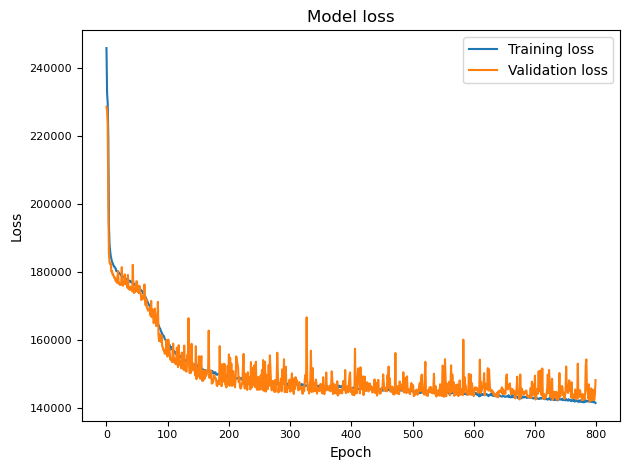

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

In [11]:
joblib.dump(model,"neural.pkl")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-05-16 20:28:32           64
variables.h5                                   2023-05-16 20:28:32       199496
config.json                                    2023-05-16 20:28:32         2239


['neural.pkl']